In [1]:
import pandas as pd 
import numpy as np

In [2]:
print(pd.__version__)

2.0.2


# Understanding Indexing

In Pandas, the index plays a vital role in organizing and accessing data. It serves as a way to label and identify rows or columns in a DataFrame or Series. The index provides a ***unique*** identifier for each data point, allowing for efficient and intuitive data manipulation and retrieval.



* **Unique Identifiers**: Each element in the index represents a unique identifier for a row or column in the data structure. This allows for efficient data retrieval and alignment.

* **Labeling**: Indexing provides labels or names to rows or columns, enabling easy referencing and selection of specific data subsets.

* **Customizable**: The index can be customized to suit the specific needs of the data. It can consist of various types such as integers, strings, dates, or even a combination of multiple levels.

* **Alignment**: Indexing facilitates aligning multiple data structures based on their index, allowing for seamless operations and computations.

* **Hierarchical Indexing**: Pandas supports hierarchical indexing, also known as multi-level indexing, where indexes can have multiple levels to represent complex hierarchical relationships in the data.

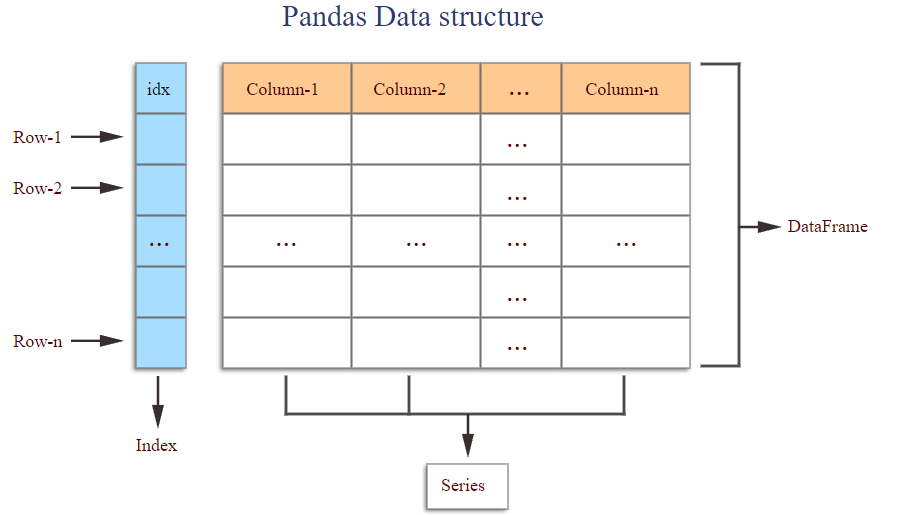


# Creating Index

## Not Specifying Index When Creating a DataFrame

In [3]:
data = {
    "name": ["Tom", "Bob", "Mary", "James", "Aria"],
    "age": [18, 30, 25, 40, 20],
    "city": ["Los Angeles", "New York", "Seattle", "Houston", "Brambleton"],
    "hobby": ["Basketball", "Football", "Dance", "Reading", "Smile"],
}th
user_info = pd.DataFrame(data)
user_info

,name,age,city,hobby
0,Tom,18,Los Angeles,Basketball
1,Bob,30,New York,Football
2,Mary,25,Seattle,Dance
3,James,40,Houston,Reading
4,Aria,20,Brambleton,Smile


## Specifying Index When Creating a DataFrame

In [4]:
index = pd.Index(["Tom", "Bob", "Mary", "James", "Aria"], name = "name")
data = {
    "age": [18, 30, 25, 40, 20],
    "city": ["Los Angeles", "New York", "Seattle", "Houston", "Brambleton"],
    "hobby": ["Basketball", "Football", "Dance", "Reading", "Smile"],
}
user_info = pd.DataFrame(data = data, index = index)
user_info

,age,city,hobby
name,,,
Tom,18,Los Angeles,Basketball
Bob,30,New York,Football
Mary,25,Seattle,Dance
James,40,Houston,Reading
Aria,20,Brambleton,Smile


##### Specifying index when reading a file
```python
pd.read_csv(".../user_info.csv", index_col = "name")
```

## Using `set_index()` to set up index
```python

set_index(keys, drop = True, append = False, inplace = False, verify_integrity = False)

```

* **keys**: This parameter specifies the column(s) to be used as the new index. It can be a single column name (as a string) or a list of column names.
* **drop**: This parameter determines whether the column(s) used as the new index should be dropped from the DataFrame. By default, it is set to True, meaning the column(s) will be removed. If set to False, the column(s) will be retained.

* **append**: This parameter specifies whether to append the new index to the existing index. By default, it is set to False, which means the existing index will be replaced. If set to True, the new index will be added as an additional level to the existing index.

* **inplace**: This parameter determines whether to modify the DataFrame in-place or return a new DataFrame with the updated index. By default, it is set to False, which means a new DataFrame will be returned. If set to True, the original DataFrame will be modified.

* **verify_integrity**: This parameter checks whether the new index contains duplicates and raises an exception if duplicates are found. By default, it is set to False. If set to True, an exception will be raised if duplicates exist.

In [5]:
data = {
    "name": ["Tom", "Bob", "Mary", "James", "Aria"],
    "age": [18, 30, 25, 40, 20],
    "city": ["Los Angeles", "New York", "Seattle", "Houston", "Brambleton"],
    "hobby": ["Basketball", "Football", "Dance", "Reading", "Smile"],
}
user_info = pd.DataFrame(data)
user_info

,name,age,city,hobby
0,Tom,18,Los Angeles,Basketball
1,Bob,30,New York,Football
2,Mary,25,Seattle,Dance
3,James,40,Houston,Reading
4,Aria,20,Brambleton,Smile


In [6]:
user_info.set_index('name')

,age,city,hobby
name,,,
Tom,18,Los Angeles,Basketball
Bob,30,New York,Football
Mary,25,Seattle,Dance
James,40,Houston,Reading
Aria,20,Brambleton,Smile


###### `append`  parameter specifies whether to append the new index to the existing index.

In [7]:
user_info.set_index('name').set_index(['age'], append = True)

,,city,hobby
name,age,,
Tom,18,Los Angeles,Basketball
Bob,30,New York,Football
Mary,25,Seattle,Dance
James,40,Houston,Reading
Aria,20,Brambleton,Smile


###### Specifying multiple indices

In [8]:
user_info.set_index(['name', 'age'])

,,city,hobby
name,age,,
Tom,18,Los Angeles,Basketball
Bob,30,New York,Football
Mary,25,Seattle,Dance
James,40,Houston,Reading
Aria,20,Brambleton,Smile


In [9]:
user_info.set_index('name', drop = False) # Keep "name" as a column in dataframe

,name,age,city,hobby
name,,,,
Tom,Tom,18,Los Angeles,Basketball
Bob,Bob,30,New York,Football
Mary,Mary,25,Seattle,Dance
James,James,40,Houston,Reading
Aria,Aria,20,Brambleton,Smile


In [10]:
user_info.set_index('name', append = True) # Keep the original index

,,age,city,hobby
,name,,,
0,Tom,18,Los Angeles,Basketball
1,Bob,30,New York,Football
2,Mary,25,Seattle,Dance
3,James,40,Houston,Reading
4,Aria,20,Brambleton,Smile


In [11]:
user_info.set_index('name', inplace = True) # Set up the index and overwrite 
user_info

,age,city,hobby
name,,,
Tom,18,Los Angeles,Basketball
Bob,30,New York,Football
Mary,25,Seattle,Dance
James,40,Houston,Reading
Aria,20,Brambleton,Smile


# Resetting the index

Sometimes, we may want to reset the existing index and start fresh. To achieve this, we can use the `reset_index()` method in pandas.

```python

DataFrame.reset_index(level = None, *, drop = False, inplace = False, col_level = 0, 
                      col_fill = '', allow_duplicates = _NoDefault.no_default, names=None)

```

* **drop**: A Boolean value that determines whether to drop the current index or keep it as a column in the DataFrame. By default, it is set to False, which means the current index will be retained as a column. If set to True, the current index will be discarded.

* **inplace**: A Boolean value that determines whether to modify the DataFrame in-place or return a new DataFrame with the reset index. By default, it is set to False, which means a new DataFrame will be returned with the reset index. If set to True, the original DataFrame will be modified, and the method will return None.

* **level**: An integer or a label that specifies the level(s) of a multi-level index to be reset. By default, it is set to None, which means all levels of the index will be reset.

* **col_level**: An integer or a label that specifies the level(s) of a multi-level column index to be reset. By default, it is set to 0, which means the first level of the column index will be reset.

* **col_fill**: A value or a dictionary that specifies the value(s) to use for filling the reset column index. If a single value is provided, it will be used for all columns. If a dictionary is provided, it should map column names to their corresponding fill values.

* **name**: A string or list of strings that specifies the name(s) to use for the reset index column(s). If a single string is provided, it will be used for all reset index columns. If a list is provided, the names should correspond to the number of reset index columns.

In [12]:
user_info

,age,city,hobby
name,,,
Tom,18,Los Angeles,Basketball
Bob,30,New York,Football
Mary,25,Seattle,Dance
James,40,Houston,Reading
Aria,20,Brambleton,Smile


In [13]:
user_info.reset_index()  # Clear up the index

,name,age,city,hobby
0,Tom,18,Los Angeles,Basketball
1,Bob,30,New York,Football
2,Mary,25,Seattle,Dance
3,James,40,Houston,Reading
4,Aria,20,Brambleton,Smile


In [14]:
user_info.reset_index().set_index('name').reset_index(drop = True) # name column has been dropped

,age,city,hobby
0,18,Los Angeles,Basketball
1,30,New York,Football
2,25,Seattle,Dance
3,40,Houston,Reading
4,20,Brambleton,Smile


###### Multi-level indexing

In [15]:
user_info

,age,city,hobby
name,,,
Tom,18,Los Angeles,Basketball
Bob,30,New York,Football
Mary,25,Seattle,Dance
James,40,Houston,Reading
Aria,20,Brambleton,Smile


In [16]:
user_info.set_index('age', append = True, inplace = True)
user_info

,,city,hobby
name,age,,
Tom,18,Los Angeles,Basketball
Bob,30,New York,Football
Mary,25,Seattle,Dance
James,40,Houston,Reading
Aria,20,Brambleton,Smile


In [17]:
user_info.reset_index()

,name,age,city,hobby
0,Tom,18,Los Angeles,Basketball
1,Bob,30,New York,Football
2,Mary,25,Seattle,Dance
3,James,40,Houston,Reading
4,Aria,20,Brambleton,Smile


In [18]:
user_info.reset_index(level = 1)  # Using the index position of a multi-level index

,age,city,hobby
name,,,
Tom,18,Los Angeles,Basketball
Bob,30,New York,Football
Mary,25,Seattle,Dance
James,40,Houston,Reading
Aria,20,Brambleton,Smile


In [19]:
user_info.reset_index(level ='name') # Using the index name of a multi-level index

,name,city,hobby
age,,,
18,Tom,Los Angeles,Basketball
30,Bob,New York,Football
25,Mary,Seattle,Dance
40,James,Houston,Reading
20,Aria,Brambleton,Smile


#  Modifying the index 

## Modifying index names 

The `rename_axis()` method in Pandas is used to modify the names of the index levels in a multi-level index. It allows you to change the name of a specific level of the index, rather than modifying the index labels themselves.

In [20]:
user_info.rename_axis(index = {'name': 'NAME', 'age': 'AGE'})

,,city,hobby
NAME,AGE,,
Tom,18,Los Angeles,Basketball
Bob,30,New York,Football
Mary,25,Seattle,Dance
James,40,Houston,Reading
Aria,20,Brambleton,Smile


The `rename()` method in pandas is used to modify the labels of the row or column index, rather than the index names.

In [21]:
user_info.rename(index = {'Tom': 'TOM'}, columns = {'city': 'CITY'})

,,CITY,hobby
name,age,,
TOM,18,Los Angeles,Basketball
Bob,30,New York,Football
Mary,25,Seattle,Dance
James,40,Houston,Reading
Aria,20,Brambleton,Smile


# Type of index

## Numeric Index


Numeric Index in Pandas refers to the use of numerical values as the index labels for rows or columns in a DataFrame or Series. There are several types of Numeric Index available in Pandas:

`RangeIndex`: It represents a range of integers as the index labels. It is an immutable index that is commonly used when no specific index labels are provided.

*Note*: `Int64Index`, `UInt64Index` & `Float64Index` were deprecated in pandas version 1.4 and have now been removed. Instead Index should be used directly, and can it now take all numpy numeric `dtypes`.

In [22]:
pd.RangeIndex(1,100,2)

RangeIndex(start=1, stop=100, step=2)

## Categorical Index

A categorical index in Pandas refers to an index that can only contain a limited number of (typically fixed) possible values or categories. Categorical indexes are created using the `CategoricalIndex` class in Pandas and are useful when dealing with data that has a fixed set of distinct values or categories.

In [23]:
pd.CategoricalIndex(['a', 'b', 'a', 'b'])

CategoricalIndex(['a', 'b', 'a', 'b'], categories=['a', 'b'], ordered=False, dtype='category')

##  Interval Index

An interval index in Pandas represents a type of index where each element corresponds to an interval or range of values. It is useful when working with data that involves intervals, such as time intervals, price ranges, or any other continuous range of values.

In [24]:
pd.interval_range(start = 0, end = 5)

IntervalIndex([(0, 1], (1, 2], (2, 3], (3, 4], (4, 5]], dtype='interval[int64, right]')

In [25]:
pd.IntervalIndex.from_breaks([0, 10, 20, 30, 40])

IntervalIndex([(0, 10], (10, 20], (20, 30], (30, 40]], dtype='interval[int64, right]')

## Multi-level Index

In [26]:
arrays = [[1, 1, 2, 2], ['red', 'blue', 'red', 'blue']]
pd.MultiIndex.from_arrays(arrays, names = ('number', 'color'))

MultiIndex([(1,  'red'),
            (1, 'blue'),
            (2,  'red'),
            (2, 'blue')],
           names=['number', 'color'])

 ## Datetime Index
 
 A `Datetime` index in Pandas is a type of index that represents dates or timestamps. It is specifically designed to handle time series data and provides various functionalities for time-based indexing and analysis.

A `Datetime` index is created using the `to_datetime()` function or by specifying the column as the index when reading data from a file. It allows for efficient slicing, grouping, resampling, and other time-related operations on the data.

In [27]:
data = {'value': [10, 20, 30, 40]}
dates = pd.to_datetime(['2023-06-01', '2023-06-02', '2023-06-03', '2023-06-04'])
df = pd.DataFrame(data, index = dates)
df

,value
2023-06-01,10
2023-06-02,20
2023-06-03,30
2023-06-04,40


## Fixed-frequency time index

`period_range` and `date_range` are both functions in Pandas that are used to generate ranges of dates or periods. They are similar in functionality but differ in the type of index they generate.

`period_range` generates a `PeriodIndex`, which represents a range of fixed-frequency periods. The periods can be specified with start and end values, along with the desired frequency.

`date_range` generates a `DatetimeIndex`, which represents a range of dates or timestamps. The dates can be specified with start and end values, along with the desired frequency.

In [28]:
pd.date_range(start = '1/1/2023', end = '1/08/2023')

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08'],
              dtype='datetime64[ns]', freq='D')

In [29]:
pd.date_range(start = '1/1/2023', periods = 8)

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08'],
              dtype='datetime64[ns]', freq='D')

In [30]:
pd.period_range(start ='2023-01-01', end= '2023-12-01', freq = 'M')

PeriodIndex(['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
             '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12'],
            dtype='period[M]')

In [31]:
pd.period_range(start = pd.Period('2023Q1', freq ='Q'),
                end = pd.Period('2023Q4', freq ='Q'), freq = 'M')

PeriodIndex(['2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08',
             '2023-09', '2023-10', '2023-11', '2023-12'],
            dtype='period[M]')

## Time delta Index
`TimedeltaIndex` is a type of index in Pandas that represents a sequence of `timedeltas`. `Timedeltas` are differences or durations between two points in time, such as the difference between two dates or timestamps.

A `TimedeltaIndex` can be created using the `timedelta_range` function in Pandas. This function allows you to generate a range of `timedeltas` with a specified start, end, and frequency.

In [32]:
pd.timedelta_range(start = '1 day', end = '3 days', freq = 'H')

TimedeltaIndex(['1 days 00:00:00', '1 days 01:00:00', '1 days 02:00:00',
                '1 days 03:00:00', '1 days 04:00:00', '1 days 05:00:00',
                '1 days 06:00:00', '1 days 07:00:00', '1 days 08:00:00',
                '1 days 09:00:00', '1 days 10:00:00', '1 days 11:00:00',
                '1 days 12:00:00', '1 days 13:00:00', '1 days 14:00:00',
                '1 days 15:00:00', '1 days 16:00:00', '1 days 17:00:00',
                '1 days 18:00:00', '1 days 19:00:00', '1 days 20:00:00',
                '1 days 21:00:00', '1 days 22:00:00', '1 days 23:00:00',
                '2 days 00:00:00', '2 days 01:00:00', '2 days 02:00:00',
                '2 days 03:00:00', '2 days 04:00:00', '2 days 05:00:00',
                '2 days 06:00:00', '2 days 07:00:00', '2 days 08:00:00',
                '2 days 09:00:00', '2 days 10:00:00', '2 days 11:00:00',
                '2 days 12:00:00', '2 days 13:00:00', '2 days 14:00:00',
                '2 days 15:00:00', '2 days 16:00:00

# Index object

In Pandas, both row and column indexes are represented by an Index object.

## Create the object

In [33]:
# Create the object using the list
pd.Index([1, 2, 3])

Index([1, 2, 3], dtype='int64')

In [34]:
pd.Index(list('abc'))

Index(['a', 'b', 'c'], dtype='object')

In [35]:
# Name the index
pd.Index(['e', 'd', 'a', 'b'], name = 'something')

Index(['e', 'd', 'a', 'b'], dtype='object', name='something')

## Look up the index

In [36]:
df = user_info
df

,,city,hobby
name,age,,
Tom,18,Los Angeles,Basketball
Bob,30,New York,Football
Mary,25,Seattle,Dance
James,40,Houston,Reading
Aria,20,Brambleton,Smile


In [37]:
df.index   # Look up the index 

MultiIndex([(  'Tom', 18),
            (  'Bob', 30),
            ( 'Mary', 25),
            ('James', 40),
            ( 'Aria', 20)],
           names=['name', 'age'])

In [38]:
df.columns # Look up the columns

Index(['city', 'hobby'], dtype='object')

## Index and columns properties

* `df.index.name`: Name of the index.

* `df.index.array`: Array representation of the index.

* `df.index.dtype`: Data type of the index.

* `df.index.shape`: Shape of the index.

* `df.index.size`: Number of elements in the index.

* `df.index.values`: Array representation of the index values.

* `df.index.empty`: Returns True if the index is empty, False otherwise.

* `df.index.is_unique`: Returns True if the index does not have duplicate values, False otherwise.

* `df.index.names`: List of names of the index levels.

* `df.index.is_all_dates`: Returns True if all the values in the index are dates or times, False otherwise.

* `df.index.has_duplicates`: Returns True if the index has duplicate values, False otherwise.

* `df.index.values`: Array representation of the index values.

## Operations
### Basic Methods

* `df.index.astype('int64')`: Convert the index to the 'int64' data type.

* `df.index.isin()`: Check if values exist in the index. See the example below.

* `df.index.rename('number')`: Rename the index.

* `df.index.nunique()`: Get the number of unique values in the index.

* `df.index.sort_values(ascending=False)`: Sort the index in descending order.

* `df.index.map(lambda x: x+'_')`: Apply a function to each value in the index.

* `df.index.str.replace('_', '')`: Replace a substring in the index with another substring.

* `df.index.str.split('_')`: Split the index values based on a delimiter.

* `df.index.to_list()`: Convert the index to a list.

* `df.index.to_frame(index=False, name='a')`: Convert the index to a DataFrame with a specified column name.

* `df.index.to_series()`: Convert the index to a Series.

* `df.index.to_numpy()`: Convert the index to a NumPy array.

* `df.index.unique()`: Get the unique values in the index.

* `df.index.value_counts()`: Get the unique values in the index and their counts.

* `df.index.where(df.index == 'a')`: Filter the index based on a condition.

* `df.index.rename('grade', inplace=False)`: Rename the index with a new name.

* `df.index.rename(['species', 'year'])`: Rename the levels of a multi-level index.

* `df.index.max()`: Get the maximum value in the index.

* `df.index.argmax()`: Get the index of the maximum value in the index.

* `df.index.any()`: Check if any value in the index is true.

* `df.index.all()`: Check if all values in the index are true.

* `df.index.T`: Transpose the index. Useful for multi-level indexes.

### Compare the differences

* `df.index.difference(pd.Index([1, 2, 4]), sort=False)`: Get the difference between the index and another index, ignoring the sorting.

* `df.index.drop('a', errors='ignore')`: Drop a specific label from the index, ignoring errors if the label doesn't exist.

* `df.index.drop_duplicates(keep='first')`: Drop duplicate values from the index, keeping the first occurrence.

* `df.index.droplevel(0)`: Drop a level from a multi-level index.

* `df.index.dropna(how='all')`: Drop NaN values from the index, keeping the rows with at least one non-NaN value.

* `df.index.duplicated(keep='first')`: Check for duplicate values in the index, marking duplicates as True in the resulting array.

* `df.index.equals(-df.index)`: Check if the index is equal to another index.

* `df.index.factorize()`: Factorize the index into an array of unique labels and an index object.

* `df.index.fillna(0, {0:'nan'})`: Fill NaN values in the index with a specified value, using a dictionary to map specific values to the NaN value.

# Duplicate indexes 

It refer to the situation where one or more rows in a DataFrame or Series have the same index value. This can occur due to various reasons, such as incorrect data merging or appending operations.

Handling duplicate indexes is important to ensure data integrity and avoid issues in data analysis. Pandas provides several methods to deal with duplicate indexes:

* `df.index.duplicated()`: Returns a boolean array indicating which index values are duplicated.
* `df.index.drop_duplicates()`: Removes duplicate index values, keeping the first occurrence.
* `df.index.is_unique`: Checks if the index has unique values.
* `df.index.get_duplicates()`: Returns a list of duplicated index values.
* `df.index.unique()`: Returns an array of unique index values.

In [39]:
df = pd.DataFrame({"A": [1, 2]}, index = ['a', 'a'])
df

,A
a,1
a,2


In [40]:
df.flags["allows_duplicate_labels"] 

True

In [41]:
s = pd.Series([1, 2], index = ['a', 'b']).set_flags(allows_duplicate_labels = False)
s

a    1
b    2
dtype: int64

# MultiIndex
MultiIndex is an important feature in Pandas that allows us to have two or more levels of indexing on Series and DataFrame objects. It enables us to represent and handle complex data structures with multiple dimensions.

In MultiIndex, each level of the index corresponds to a label, which can be used to select and manipulate data. By using multi-level indexing, we can represent multiple dimensions of information on a single axis, similar to using multiple columns to define an index in a database table.

MultiIndex can be applied to the row index or column index of Series and DataFrame objects. With multi-level indexing, we can perform higher-dimensional data aggregation, slicing, filtering, and analysis operations.

## MultiIndex on series
### Create MultiIndex

In [42]:
se1=pd.Series(np.random.randn(4),index = [list("aabb"),[1,2,1,2]])
se1

a  1    0.872031
   2    0.452025
b  1   -1.473243
   2    0.357248
dtype: float64

### Select the subset

In [43]:
se1['a']

1    0.872031
2    0.452025
dtype: float64

In [44]:
se1['a': 'b']

a  1    0.872031
   2    0.452025
b  1   -1.473243
   2    0.357248
dtype: float64

###  Inner level of a multi-level indexed Series

In [45]:
# access the values corresponding to the second level index 1 
se1[:, 1]

a    0.872031
b   -1.473243
dtype: float64

In [46]:
# access the values corresponding to the second level index 1 
se1[:, 2]

a    0.452025
b    0.357248
dtype: float64

## MultiIndex on DataFrame
### Create a multi-level row index
##### Implicit method with a list of lists

In [47]:
df = pd.DataFrame(np.random.randint(0, 150, size=(6,3)), 
                  columns=['Math', 'Verbal', 'Python'], 
                  index=[['Michal', 'Michal', 'Kobe','Kobe', 'James', 'James'],
                         ['Mid','Final', 'Mid', 'Final','Mid', 'Final']])
df

Math  Verbal  Python
Michal Mid      68      97     147
       Final   117     114      11
Kobe   Mid      38     107      74
       Final   140     136      23
James  Mid      69      14     136
       Final    26      17       7

#### explicit method
##### `from_arrays`

In [48]:
df = pd.DataFrame(np.random.randint(0, 150, size = (6,3)), 
                  columns = ['Verbal', 'Math', 'Python'], 
                  index = pd.MultiIndex.from_arrays([['Michael', 'Michael', 'Kobe','Kobe', 'James', 'James'],
                                                     ['Midterm','Final', 'Midterm', 'Final','Midterm', 'Final']]))
df

Verbal  Math  Python
Michael Midterm     105    65      82
        Final        44    66      25
Kobe    Midterm      57   143     104
        Final        54    23      45
James   Midterm     137   126      92
        Final       125    34       3

##### ```from_tuples```

In [49]:
df = pd.DataFrame(np.random.randint(0, 150, size=(6,3)), 
                  columns = ['Verbal', 'Math', 'Python'], 
                  index = pd.MultiIndex.from_tuples([('Michal','Mid'), ('Michal','Final'), ('Kobe','Mid'), ('Kobe','Final'), ('James','Mid'), ('James','Final')]))
df

Verbal  Math  Python
Michal Mid       143    69      11
       Final      97    64      22
Kobe   Mid        95   146      55
       Final      92   105     136
James  Mid        81    95      92
       Final      19    25      93

##### ```from_product```

In [50]:
df = pd.DataFrame(np.random.randint(0, 150, size=(6,3)), 
                  columns=['Verbal', 'Math', 'Python'], 
                  index = pd.MultiIndex.from_product([['Michal','Kobe','James'],['Mid','Final']]))
df

Verbal  Math  Python
Michal Mid       112   114      25
       Final     103    31      35
Kobe   Mid        71    84      52
       Final      10    67      40
James  Mid       113   101     146
       Final      24    39     141

### Create a multi-level row index using columns in DataFrame

In [51]:
df

Verbal  Math  Python
Michal Mid       112   114      25
       Final     103    31      35
Kobe   Mid        71    84      52
       Final      10    67      40
James  Mid       113   101     146
       Final      24    39     141

In [52]:
df.reset_index(inplace = True)

# Revise the first column to name, second column to term 
df.rename(columns={'level_0': 'Name', 'level_1': 'Term'}, inplace = True)
df

,Name,Term,Verbal,Math,Python
0,Michal,Mid,112,114,25
1,Michal,Final,103,31,35
2,Kobe,Mid,71,84,52
3,Kobe,Final,10,67,40
4,James,Mid,113,101,146
5,James,Final,24,39,141


In [53]:
# Set up the MultiIndex 
df.set_index(['Name', 'Term'])

Verbal  Math  Python
Name   Term                       
Michal Mid       112   114      25
       Final     103    31      35
Kobe   Mid        71    84      52
       Final      10    67      40
James  Mid       113   101     146
       Final      24    39     141

### Create a multi-level column index

In [54]:
df = pd.DataFrame(np.random.randint(0, 150, size = (3,6)), 
                  index = ['Verbal', 'Math', 'Python'], 
                  columns = pd.MultiIndex.from_product([['Michael','Kobe','James'],['Mid','Final']]))
df

Michael       Kobe       James      
           Mid Final  Mid Final   Mid Final
Verbal      29    19  110     0    95    21
Math        91    51   13    59    39    75
Python     143    72  141     3   103    77

### Indexing and Swapping Index
##### Prepare the data

In [55]:
df1 = pd.DataFrame(np.arange(12).reshape(4,3), index = [list("AABB"), [1,2,1,2]],  # two indices
                  columns = [list("XXY"),[10, 11, 10]]) # two columns
df1

X       Y
    10  11  10
A 1  0   1   2
  2  3   4   5
B 1  6   7   8
  2  9  10  11

##### Change index names

In [56]:
# change columns names to  "XY" and "sum",column index names are XY and sum
# change the indices name to "AB" and "num"
df1.columns.names = ['XY','sum']
df1.index.names = ['AB','num']
df1

XY      X       Y
sum    10  11  10
AB num           
A  1    0   1   2
   2    3   4   5
B  1    6   7   8
   2    9  10  11

##### Creating a MultiIndex Object as an Index

In [57]:
df1

XY      X       Y
sum    10  11  10
AB num           
A  1    0   1   2
   2    3   4   5
B  1    6   7   8
   2    9  10  11

In [58]:
df1.index = pd.MultiIndex.from_arrays([list("AABB"),[3,4,3,4]],names = ["AB","new_num"])
df1

XY          X       Y
sum        10  11  10
AB new_num           
A  3        0   1   2
   4        3   4   5
B  3        6   7   8
   4        9  10  11

##### Swap the index

In [59]:
df1

XY          X       Y
sum        10  11  10
AB new_num           
A  3        0   1   2
   4        3   4   5
B  3        6   7   8
   4        9  10  11

In [60]:
df1.swaplevel('AB','new_num')

XY          X       Y
sum        10  11  10
new_num AB           
3       A   0   1   2
4       A   3   4   5
3       B   6   7   8
4       B   9  10  11

In [61]:
# Reordering the Index to AB, new_num
df1.reorder_levels(['AB','new_num'],axis = 0).sort_index().head()

XY          X       Y
sum        10  11  10
AB new_num           
A  3        0   1   2
   4        3   4   5
B  3        6   7   8
   4        9  10  11

### Retrieving the index values

In [62]:
# Prepare the data
df = pd.DataFrame(np.random.randint(0, 150, size = (6,3)), 
                  columns = ['Verbal', 'Math', 'Python'], 
                  index = pd.MultiIndex.from_product([['Michael','Kobe','James'],['Midterm','Final']]))
df

Verbal  Math  Python
Michael Midterm      56    40      50
        Final       128    43      84
Kobe    Midterm      91    72      33
        Final        39    22     120
James   Midterm      67    84     126
        Final        52    60      80

In [63]:
df.index

MultiIndex([('Michael', 'Midterm'),
            ('Michael',   'Final'),
            (   'Kobe', 'Midterm'),
            (   'Kobe',   'Final'),
            (  'James', 'Midterm'),
            (  'James',   'Final')],
           )

In [64]:
# Get the first-level index values
df.index.get_level_values(0)

Index(['Michael', 'Michael', 'Kobe', 'Kobe', 'James', 'James'], dtype='object')

In [65]:
# Get the second-level index values
df.index.get_level_values(1)

Index(['Midterm', 'Final', 'Midterm', 'Final', 'Midterm', 'Final'], dtype='object')

In [66]:
df.loc['James',:]

,Verbal,Math,Python
Midterm,67,84,126
Final,52,60,80


In [67]:
df.index.get_level_values(0) == "Michael" # return True and False

array([ True,  True, False, False, False, False])

In [68]:
df[df.index.get_level_values(0) == 'Michael']

Verbal  Math  Python
Michael Midterm      56    40      50
        Final       128    43      84

In [69]:
df[df.index.get_level_values(1) == 'Midterm']

,,Verbal,Math,Python
Michael,Midterm,56,40,50
Kobe,Midterm,91,72,33
James,Midterm,67,84,126


In [70]:
df.loc[("James","Midterm"),:]

Verbal     67
Math       84
Python    126
Name: (James, Midterm), dtype: int32